<h2>Health Insight AI for Heart Desease Prediction</h2>


In [91]:
#Importin important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

print("Libraries installed successfully!")

Libraries installed successfully!


In [92]:
#Data loading
#Fetching dataset, id=45 is for heart desease
dataset = fetch_ucirepo(id=45)

#get the full orignal dataframe
df = dataset.data.original

print("Data loaded successfully")
print("Shape: ", df.shape)

df.head() 

#Basic data overview
print("\nBasic data overview")
df.info()
df.describe().T

#Check uniques values in each column
print("\nCheck uniques values in each column")
df.nunique()

#Missing values check
print("\nChecking the Missing values")
print(df.isnull().sum())


Data loaded successfully
Shape:  (303, 14)

Basic data overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB

Check uniques values in each column

Checking the Missing values
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
reste

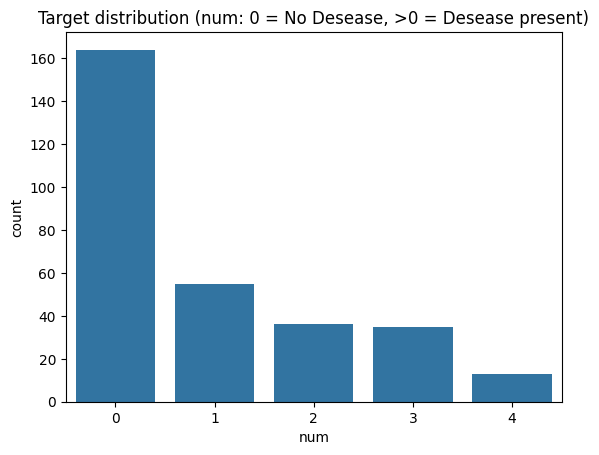

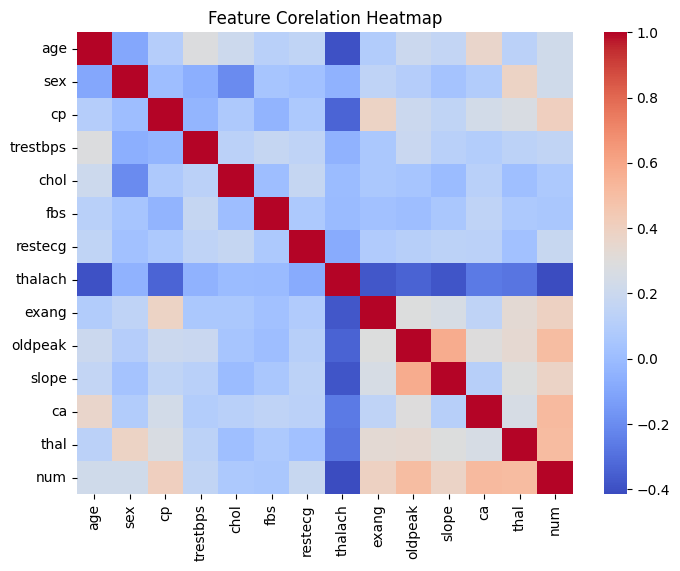

In [93]:
#Exploratory Data Analysis
#Distribution of target variable
sns.countplot(x='num', data=df)
plt.title("Target distribution (num: 0 = No Desease, >0 = Desease present)")
plt.show()

#Corelation Heatmap
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = False)
plt.title("Feature Corelation Heatmap")
plt.show()

In [94]:
#Feature Engineering and Data Preparation
#Simplify target and convert num > 0 = 1 (desease present)

print(df.columns)
df["target"] = df["num"].apply(lambda x: 1 if x > 0 else 0)
df.drop("num", axis = 1, inplace= True)

#Separate index (X) and output (y)
X = df.drop("target", axis= 1)
y = df["target"]

#handle missing values if any
X = X.fillna(X.median())
#Missing values check again after handling them
#print("\nChecking the Missing values")
#print(X.isnull().sum())

# Train, Test and Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
print("Train Shape: ", X_train.shape, "\nTest Shape: ", X_test.shape)

#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nData scalled successfully.")



Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')
Train Shape:  (242, 13) 
Test Shape:  (61, 13)

Data scalled successfully.


In [95]:
#Model Training
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

acc_scr = accuracy_score(y_test, y_pred)

print(f"Model trained successfully {acc_scr:.4f}")


Model trained successfully 0.8689


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



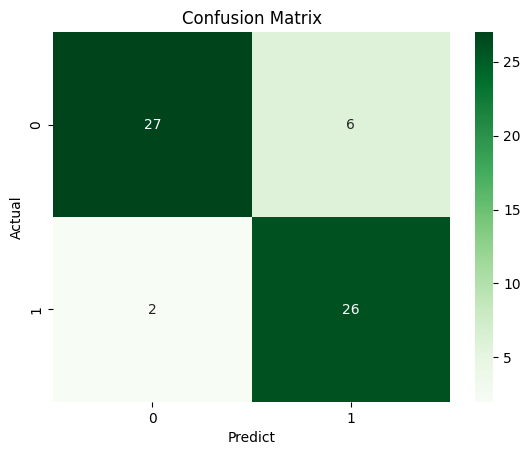

In [96]:
#Model Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix")
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()


In [97]:
#Save Model and Scaler
joblib.dump(model, "../models/heart_model.pkl")
joblib.dump(scaler, "../models/scaler.pkl")

print("Heart and scaler are saved to /models folder successfully.")

Heart and scaler are saved to /models folder successfully.


In [103]:
#Monitoring
#Log metrics for monitoring
metrics = {"accuracy":acc_scr}
pd.DataFrame([metrics]).to_csv("../logs/metrics.csv", index= False)
print("Metrics logged to /logs/metrics.csv")

Metrics logged to /logs/metrics.csv
